In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Importing iris dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

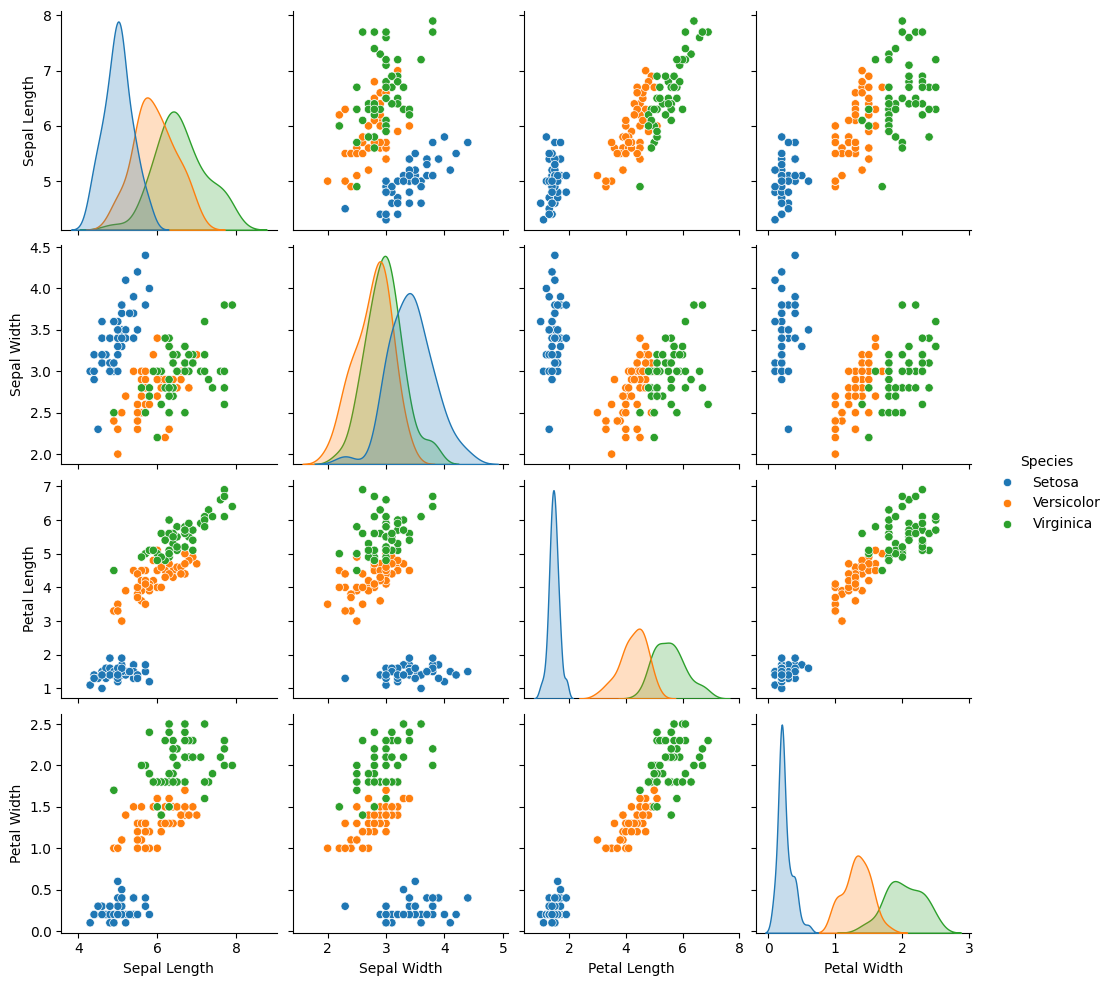

In [12]:
#Pairplot with seaborn for every species
import seaborn as sns
df = pd.DataFrame(data=X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['Species'] = pd.Categorical.from_codes(y, categories=['Setosa', 'Versicolor', 'Virginica'])
sns.pairplot(df, hue='Species')
plt.show()

In [14]:
#Only taking two features i.e sepal length and sepal width and two targets Versicolor and Virginica
X = X[y != 0, :2]
y = y[y != 0]

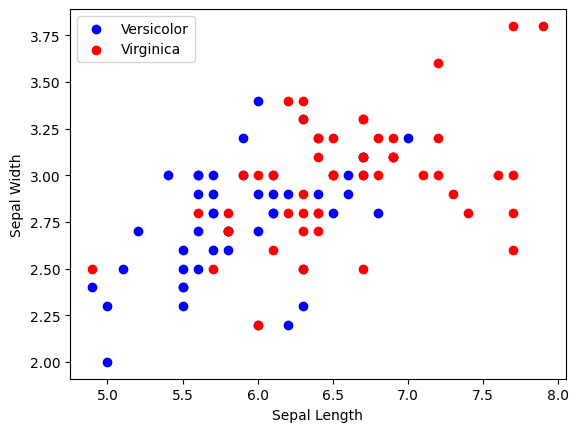

In [15]:
#Visualizing the two classes
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Versicolor')
plt.scatter(X[y==2,0], X[y==2,1], color='red', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

In [16]:
#Running independent classifier first to see the performance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8


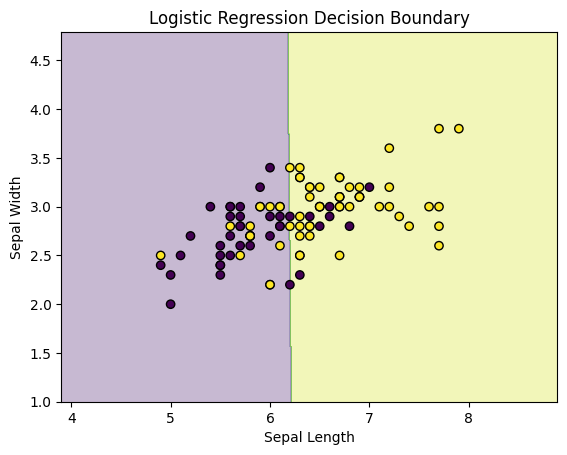

In [17]:
#Plotting decision boundary for logistic regression
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [ ]:
#Importing algorithms for voting classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [24]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
#Creating Estimators list
estimators = [('logistic', clf1), ('knn', clf2), ('random_forest', clf3)]

In [26]:
#Testing accuracy score for each classifier
for name, clf in estimators:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    

logistic Accuracy: 0.8
knn Accuracy: 0.55
random_forest Accuracy: 0.55


In [27]:
#Importin Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier Accuracy: 0.55


In [28]:
#Importin Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier Accuracy: 0.55


In [33]:
#Giving weights to each classifier in soft voting
voting_clf = VotingClassifier(estimators=estimators, voting='soft', weights=[6,2,1])
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Weighted Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Weighted Voting Classifier Accuracy: 0.6


In [35]:
#Using SVC with poly kernel for different degree and analysing their individual performance at first
from sklearn.svm import SVC
for degree in [1,2,3,4,5]:
    svc_clf = SVC(kernel='poly', degree=degree, probability=True)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)
    print(f"SVC with degree {degree} Accuracy: {accuracy_score(y_test, y_pred)}")

SVC with degree 1 Accuracy: 0.65
SVC with degree 2 Accuracy: 0.7
SVC with degree 3 Accuracy: 0.75
SVC with degree 4 Accuracy: 0.55
SVC with degree 5 Accuracy: 0.65


In [36]:
#Creating Estimators list for SVC classifiers
svc_estimators = []
for degree in [1,2,3,4,5]:
    svc_clf = SVC(kernel='poly', degree=degree, probability=True)
    svc_estimators.append((f'svc_degree_{degree}', svc_clf))

In [39]:
#Creating voting classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=svc_estimators, voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Voting Classifier with SVCs Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier with SVCs Accuracy: 0.75


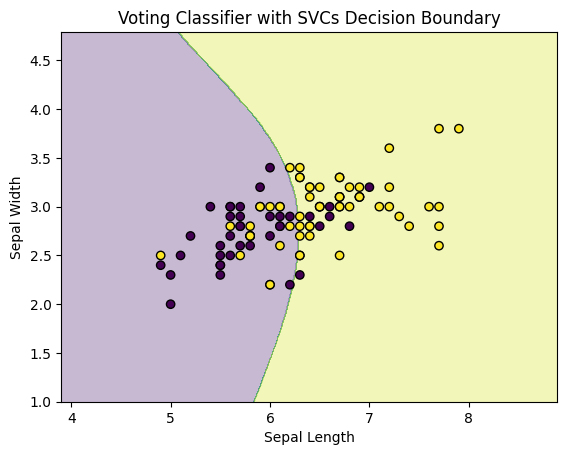

In [40]:
#Drawing decision boundary for voting classifier with SVCs
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = voting_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Voting Classifier with SVCs Decision Boundary')
plt.show()